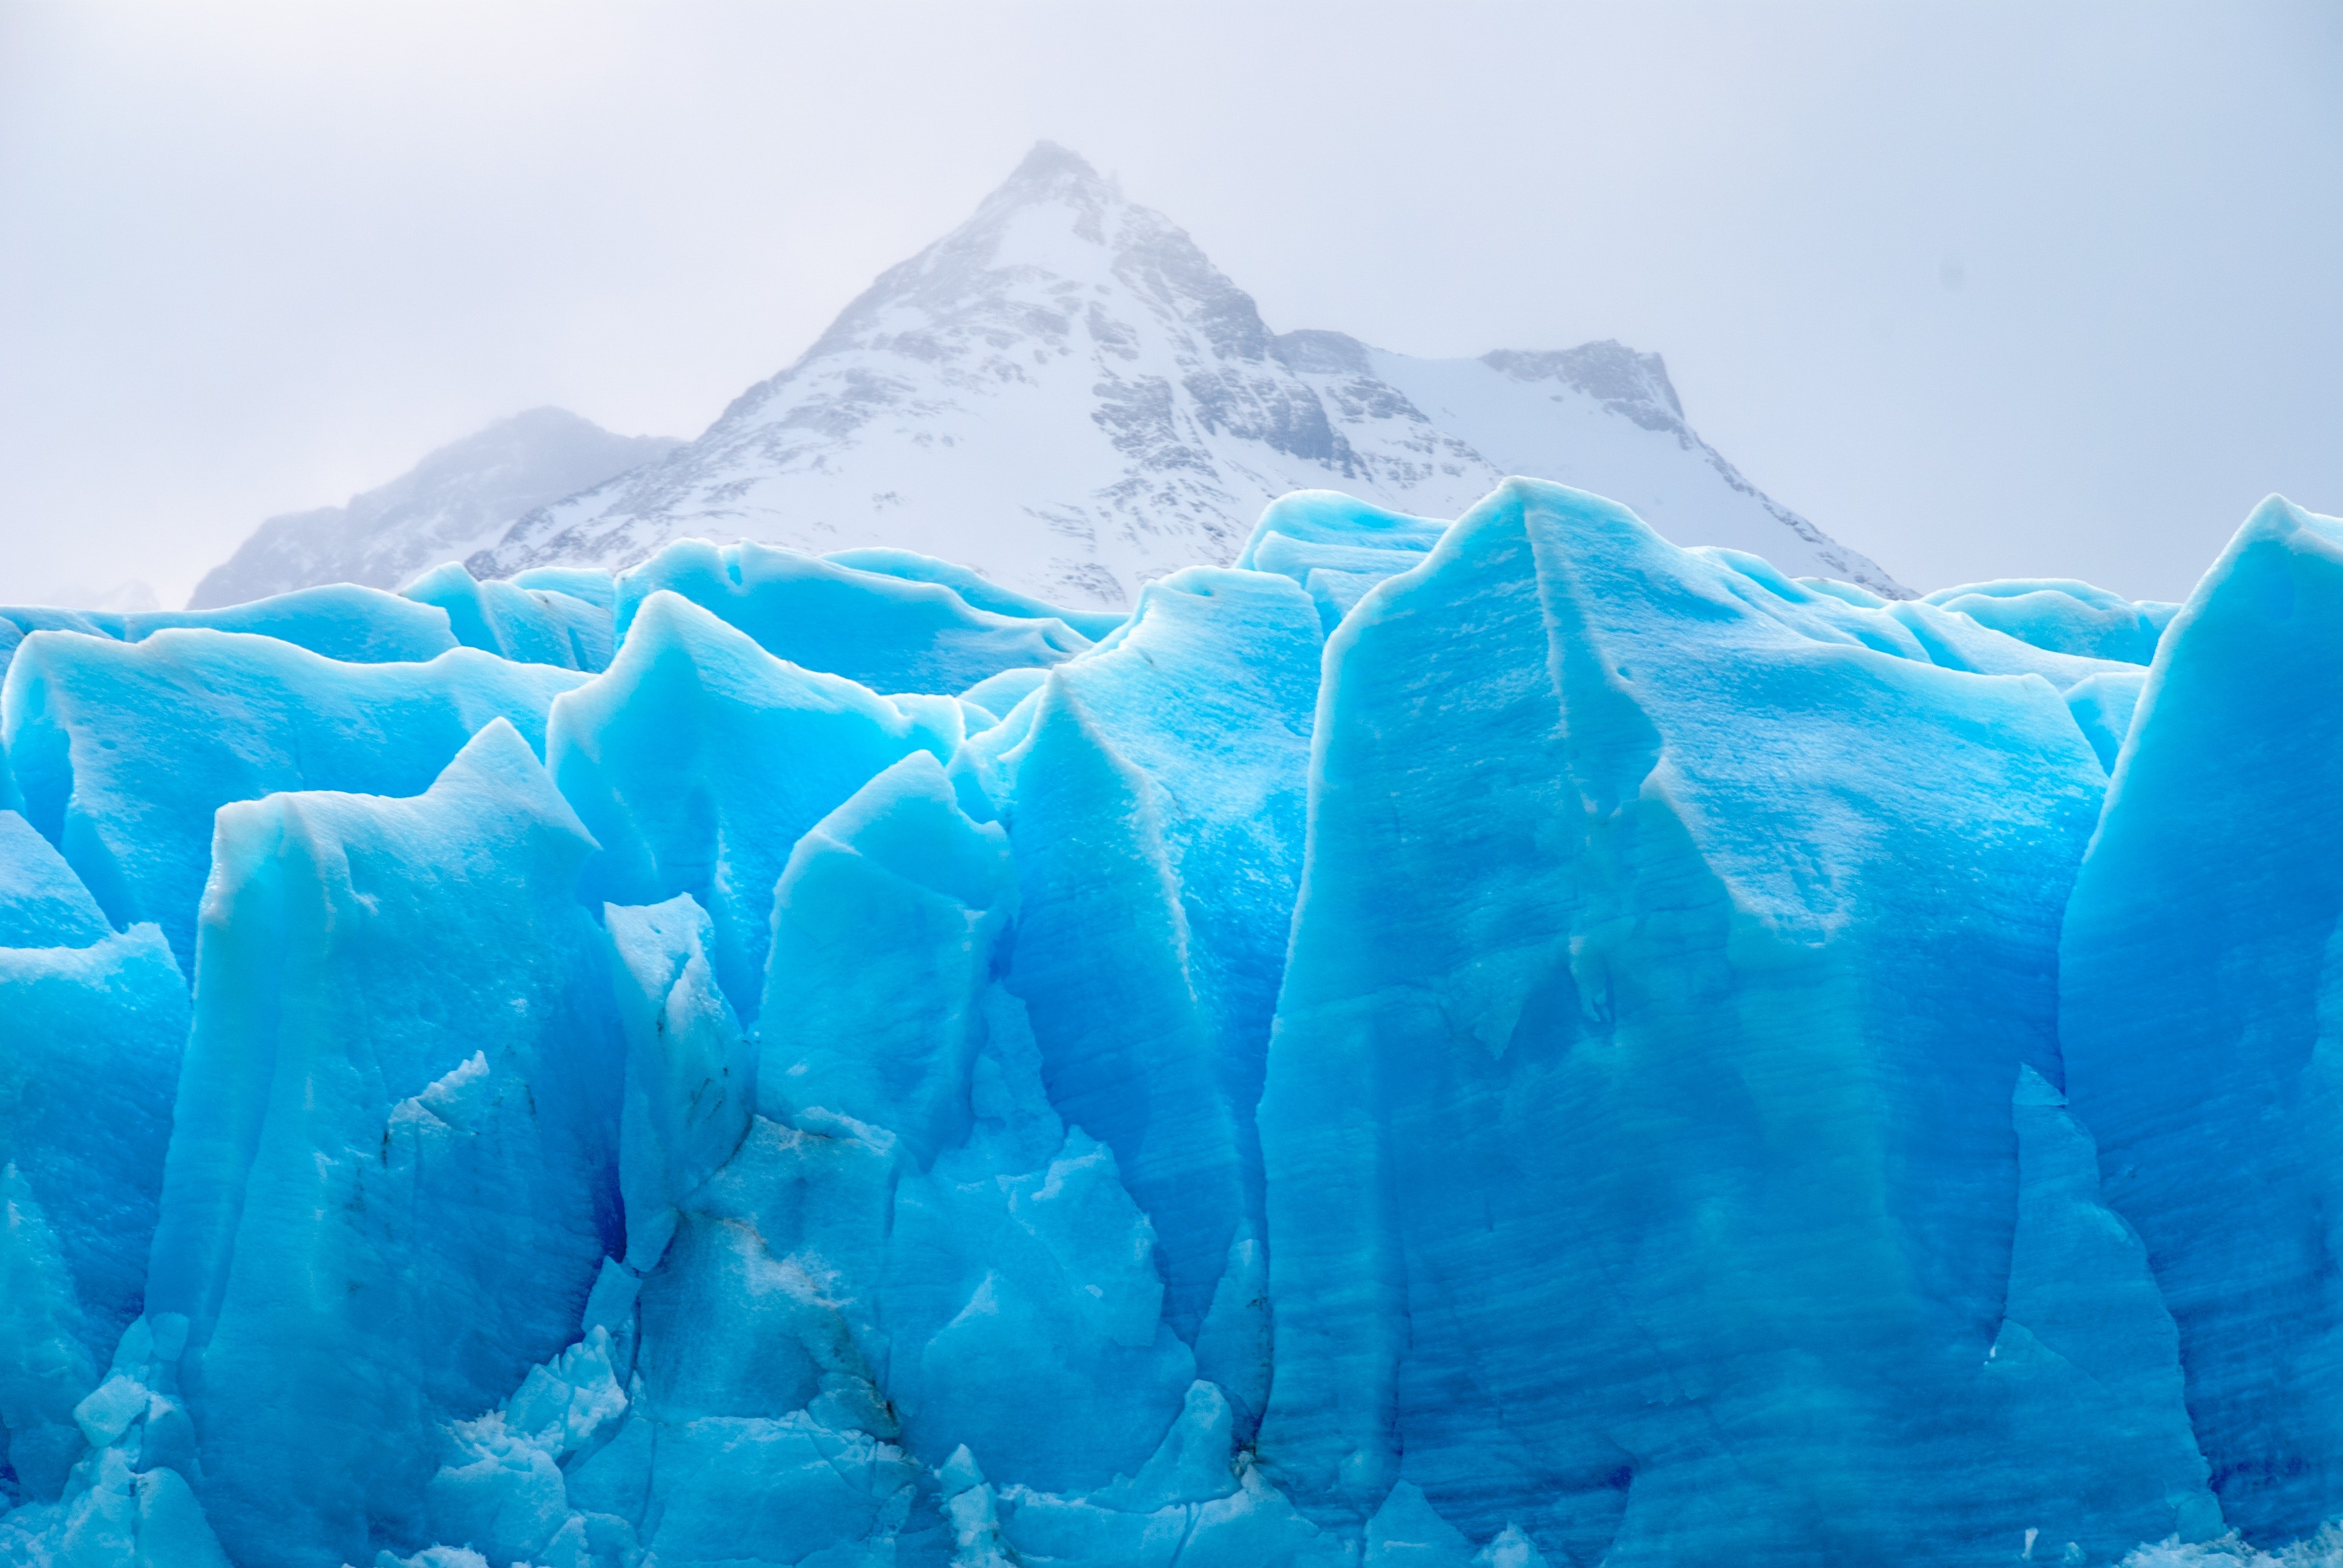

   #  **EXPLORE WEATHER TRENDS** 

**Project #1 :Udacity Data Analyst Nanodegree Program**

**Adeeba Latheef**     
**Date : 10/06/2021**    
**Seattle, US**

## **Overview**

In this project, we will analyze local and global temperature data and compare the temperature trends of **Seattle** city to overall global temperature trends.

## **Objectives**

- Extract the local & global temperature data using SQL from the Udacity data portal.         
- Analyze the data in python & calculate the moving averages.              
- Visualize the moving averages using a Line plot.             
- Document the findings in to a PDF.             


## **Tools**

- SQL 

- Python


## **Data Schema**

There are three tables in the database:

* **city_list** (`city`,`country`)- This contains a list of cities and countries in the database.

* **city_data** ( `year`,`city`,`country`&`avg_temp`) - This contains the average temperatures for each city by year (ºC).
            
* **global_data** (`year`& `avg_temp`) - This contains the average global temperatures by year (ºC).
                

## **Data Selection & Extraction**



Here we use **SQL** to query the temperature data on a global and city level, from the Udacity data portal. 

* **Extract the city from the table `city_list`**                      

Here we will check whether this table contains Seattle city.
 ````sql
SELECT * 
FROM city_list 
WHERE city LIKE '%Seattle%';
````
The above query gives an output with `city` field as **Seattle** and `Country` field as **United States**.

Now that it's clear that we have Seattle temperature data, we can extract it from the `city_data` table.

* **City level temperature data**

````sql
SELECT * 
FROM city_data
WHERE city='Seattle';
````

`city_data` table has **186** records of temperature data of Seattle city available for the years **1828 to 2013**.


* **Global temperature data**

````sql
SELECT *
FROM global_data;
````
`global_data` table has **266** records of average temperature values ranging from the year **1750 to 2015**.                
 


* **JOIN global and city level data**

A `JOIN` clause is used to combine rows from two or more tables, based `ON` a related column between them.
Here we will join global and city data ON `year` column.

````sql
SELECT g.year,
       g.avg_temp AS global_temp,
       c.city,
       c.country,
       c.avg_temp AS city_temp
FROM global_data g
JOIN city_data c
ON(g.year=c.year)
WHERE c.city='Seattle';
````

The above query gives **186** records containing average temperature data( global & city level) from the year **1828 to 2013** for Seattle City.

Now that we have all the data in a single result table let's download it as a **CSV** file.


## **Data Cleaning**


Data cleaning is crucial for identifying and removing inconsistencies in the data before we start the analysis.             

* **`pandas`** - Data manipulation & data analysis
* **`numpy`**  - Numerical Python-array transformation
* **`matplotlib` & `seaborn`**- Visualization libraries


In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting the style of plots
sns.set(style='whitegrid')
#avoiding unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

#embedding plots inside the notebook
%matplotlib inline
#render high resolution plots
%config InlineBackend.figure_format = 'retina'

In [2]:
#Reading the CSV data using pandas
temperature = pd.read_csv('C:\\Users\\soumi\\Documents\\Udacity Data Analytics Nanodegree\\Project1- Exploring Weather Trends\\Temperature.csv')

Now let's explore this dataset a bit using the pandas library functions, `dataframe.info()` and `dataframe.head()`.

In [3]:
#Pandas dataframe.head() function returns the first n rows in the data.(default=5 rows)
temperature.head(7)

,year,global_temp,city,country,city_temp
0,1828,8.17,Seattle,United States,7.13
1,1829,7.94,Seattle,United States,6.80
2,1830,8.52,Seattle,United States,NaN
3,1831,7.64,Seattle,United States,NaN
4,1832,7.45,Seattle,United States,3.52
5,1833,8.01,Seattle,United States,7.48
6,1834,8.15,Seattle,United States,7.10


In [4]:
#Pandas dataframe.info() function is used to get a concise summary of the dataframe.
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         186 non-null    int64  
 1   global_temp  186 non-null    float64
 2   city         186 non-null    object 
 3   country      186 non-null    object 
 4   city_temp    183 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.4+ KB


* There are a total of **186 rows** and **5 columns** in the data set.
* Data types are assigned accurately.
* Out of the 186 records, only 183 city_temp columns contain non-null values.
* Therefore`city_temp` column containing the seattle city average temperatures has **null** values.

#### **Dropping the NULLs & Resetting the index**

In [5]:
#Counting the NULLs
temperature.isnull().sum()

year           0
global_temp    0
city           0
country        0
city_temp      3
dtype: int64

In [6]:
#Locating the NULLs
temperature[temperature['city_temp'].isnull()]

,year,global_temp,city,country,city_temp
2,1830,8.52,Seattle,United States,NaN
3,1831,7.64,Seattle,United States,NaN
18,1846,8.55,Seattle,United States,NaN


Here we can see that `city_temp` is missing values for 3 years (1830,1831,1846). Since this constitutes only less than 2% of the whole data, we can drop them.

In [7]:
# Dropping the NULLs
temperature = temperature.dropna()

Now let's take a look at the first 20 rows of the data and check whether rows 2,3 and 18 which contained the NULLs are removed.

In [8]:
#Inspecting the removed rows
temperature.head(20)

,year,global_temp,city,country,city_temp
0,1828,8.17,Seattle,United States,7.13
1,1829,7.94,Seattle,United States,6.80
4,1832,7.45,Seattle,United States,3.52
5,1833,8.01,Seattle,United States,7.48
6,1834,8.15,Seattle,United States,7.10
7,1835,7.39,Seattle,United States,5.58
8,1836,7.70,Seattle,United States,6.74
9,1837,7.38,Seattle,United States,6.81
10,1838,7.51,Seattle,United States,6.59
11,1839,7.63,Seattle,United States,7.30


* After dropping the NULLs there are some missing indices (rows 2,3 & 18).
* We can fix this by resetting the index using `dataframe.reset_index()`function.

In [9]:
#Resetting index after dropping the NULLs
temperature = temperature.reset_index(drop=True)
temperature.head()

,year,global_temp,city,country,city_temp
0,1828,8.17,Seattle,United States,7.13
1,1829,7.94,Seattle,United States,6.80
2,1832,7.45,Seattle,United States,3.52
3,1833,8.01,Seattle,United States,7.48
4,1834,8.15,Seattle,United States,7.10


#### **Checking for duplicate data**

In [10]:
#Counting duplicate data
temperature.duplicated().sum()

0

There are no duplicate records in our data.        
Let us take one final look at the summary of the dataframe before we move on to analyze our dataset.

In [11]:
#Looking at the cleaned data summary
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         183 non-null    int64  
 1   global_temp  183 non-null    float64
 2   city         183 non-null    object 
 3   country      183 non-null    object 
 4   city_temp    183 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.3+ KB


## **Data Analysis**

#### Statistical Analysis using the `dataframe.describe()` function

In [12]:
#Descriptive Statistical Analysis
temperature.describe()

,year,global_temp,city_temp
count,183.000000,183.000000,183.000000
mean,1921.890710,8.481311,7.501366
std,53.149065,0.497103,0.739375
min,1828.000000,7.380000,3.520000
25%,1876.500000,8.130000,7.055000
50%,1922.000000,8.440000,7.500000
75%,1967.500000,8.750000,7.915000
max,2013.000000,9.730000,9.950000


**Observations** 
* From the mean value it is clear that Seattle city is cooler by only < 1°C than the global average temperature.
* Seattle's high standard deviation(SD) at 0.73 when compared to global SD at 0.49, indicates that the city's temperatures are spread out at a wider range.
* The above point can be confirmed by looking at the min and max values for `global_temp` and `city_temp`.
* The global average temperature ranges from 7.38°C to 9.73°C , whereas Seattle average temperature lies at a much more wider range i.e. 3.52°C to 9.95°C.


#### Calculating Simple Moving Averages

Plotting moving averages render plots that are smoother than the original data and captures the main movement of the time series without all of the minor fluctuations.
This is done by calculating averages for different subset of the data and modifying the subset each time by shifting forward. 
The order of the moving average determines the smoothness of the trend-cycle. 
In general, a larger order means a smoother curve.

For our temperature data in order to calculate the moving averages, we calculate the average temperature for a fixed 10 year window and keep shifting the subset forward by 1 year until the end of the data.

Here we calculate 10 year moving average using the `rolling()`function & specify the subset order in the window argument.

In [13]:
#Calculating 10-years moving average
temperature['global_MAT'] = temperature.iloc[:,1].rolling(window=10).mean()
temperature['seattle_MAT'] = temperature.iloc[:,4].rolling(window=10).mean()

#Looking at the moving averages
temperature.head(20)

,year,global_temp,city,country,city_temp,global_MAT,seattle_MAT
0,1828,8.17,Seattle,United States,7.13,NaN,NaN
1,1829,7.94,Seattle,United States,6.80,NaN,NaN
2,1832,7.45,Seattle,United States,3.52,NaN,NaN
3,1833,8.01,Seattle,United States,7.48,NaN,NaN
4,1834,8.15,Seattle,United States,7.10,NaN,NaN
5,1835,7.39,Seattle,United States,5.58,NaN,NaN
6,1836,7.70,Seattle,United States,6.74,NaN,NaN
7,1837,7.38,Seattle,United States,6.81,NaN,NaN
8,1838,7.51,Seattle,United States,6.59,NaN,NaN
9,1839,7.63,Seattle,United States,7.30,7.733,6.505


The moving averages have been populated accurately and can be used to visualize the temperature trends effectively.


#### Correlation Analysis

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate in relation to each other.                              
Correlation coefficients always range between -1 (strong negative relationship) and +1 (strong positive relationship). 
Values less than +0.8 or greater than -0.8 are not usually considered significant.                                
Pandas `dataframe.corr()` can be used to find the pairwise correlation of all columns in the dataframe.

In [14]:
#Calculating correlation coefficient
corr = temperature.corr()
corr

,year,global_temp,city_temp,global_MAT,seattle_MAT
year,1.000000,0.880532,0.508538,0.941185,0.824729
global_temp,0.880532,1.000000,0.617925,0.926832,0.851898
city_temp,0.508538,0.617925,1.000000,0.503745,0.555584
global_MAT,0.941185,0.926832,0.503745,1.000000,0.904716
seattle_MAT,0.824729,0.851898,0.555584,0.904716,1.000000


We can visualize these correlation coefficients as a heat map for easy analysis in the next section.

## **Data Visualization**

First let us plot a line chart for the 10-year moving average temperatures we calculated.

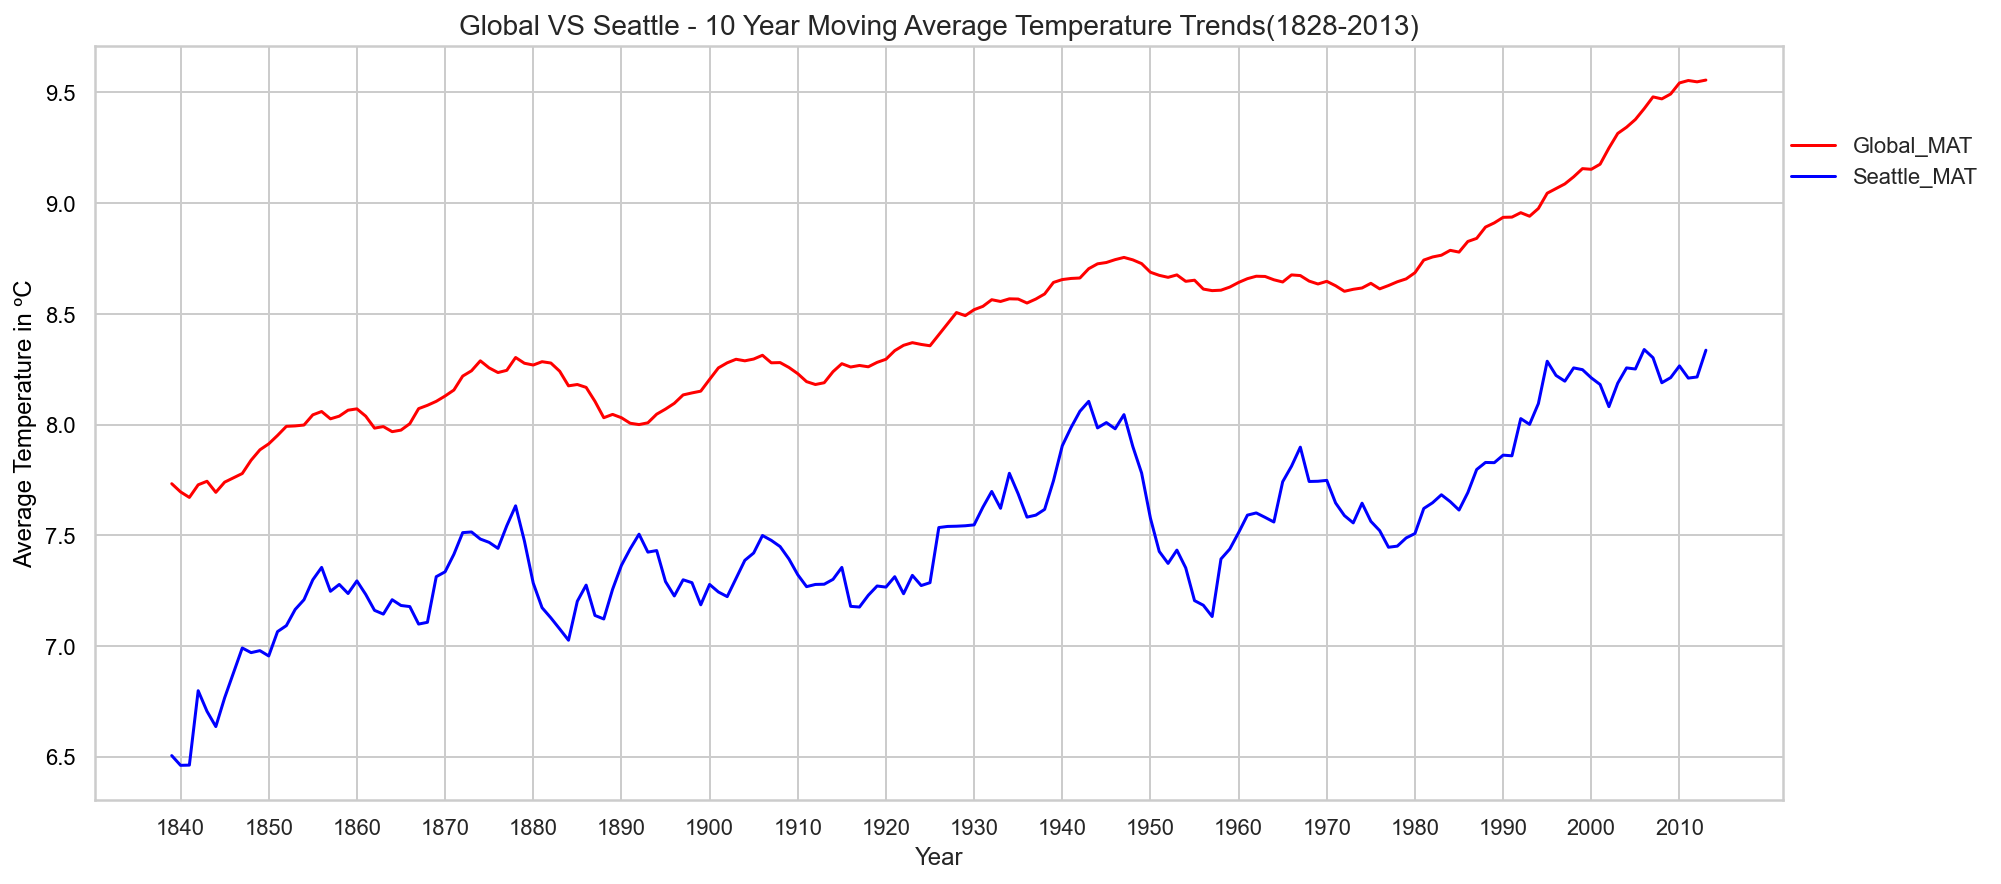

In [15]:
# Plotting line chart
fig, ax = plt.subplots(figsize=[14,6])

# Plotting for Global Average Temperature
ax.plot(temperature.year, temperature.global_MAT, label='Global_MAT',color='red')
plt.xticks(np.arange(0, max(temperature.year)+1, 10))
ax.set_xlabel('Year', size=12)
ax.set_ylabel('Average Temperature in ºC', color='black', size=12)
ax.tick_params(axis='y', labelcolor='black')

# Plotting for Seattle Average Temperature
ax.plot(temperature.year, temperature.seattle_MAT, label='Seattle_MAT',color='blue')
ax.tick_params(axis='y', labelcolor='black')
ax.legend(loc=[1,0.8], frameon=False)

fig.tight_layout()
ax.set_title("Global VS Seattle - 10 Year Moving Average Temperature Trends(1828-2013)", size=14)
plt.show()

Insights: 
* Global average temperature is observed to be always at a higher level than Seattle city although both fall in to a very close range of values.
* Notice that the plot is getting steeper as we move from 20th century to 21st century.

To explore more similarities and contrasts in the data we visualize the average temperatures and moving averages in the same line plot.

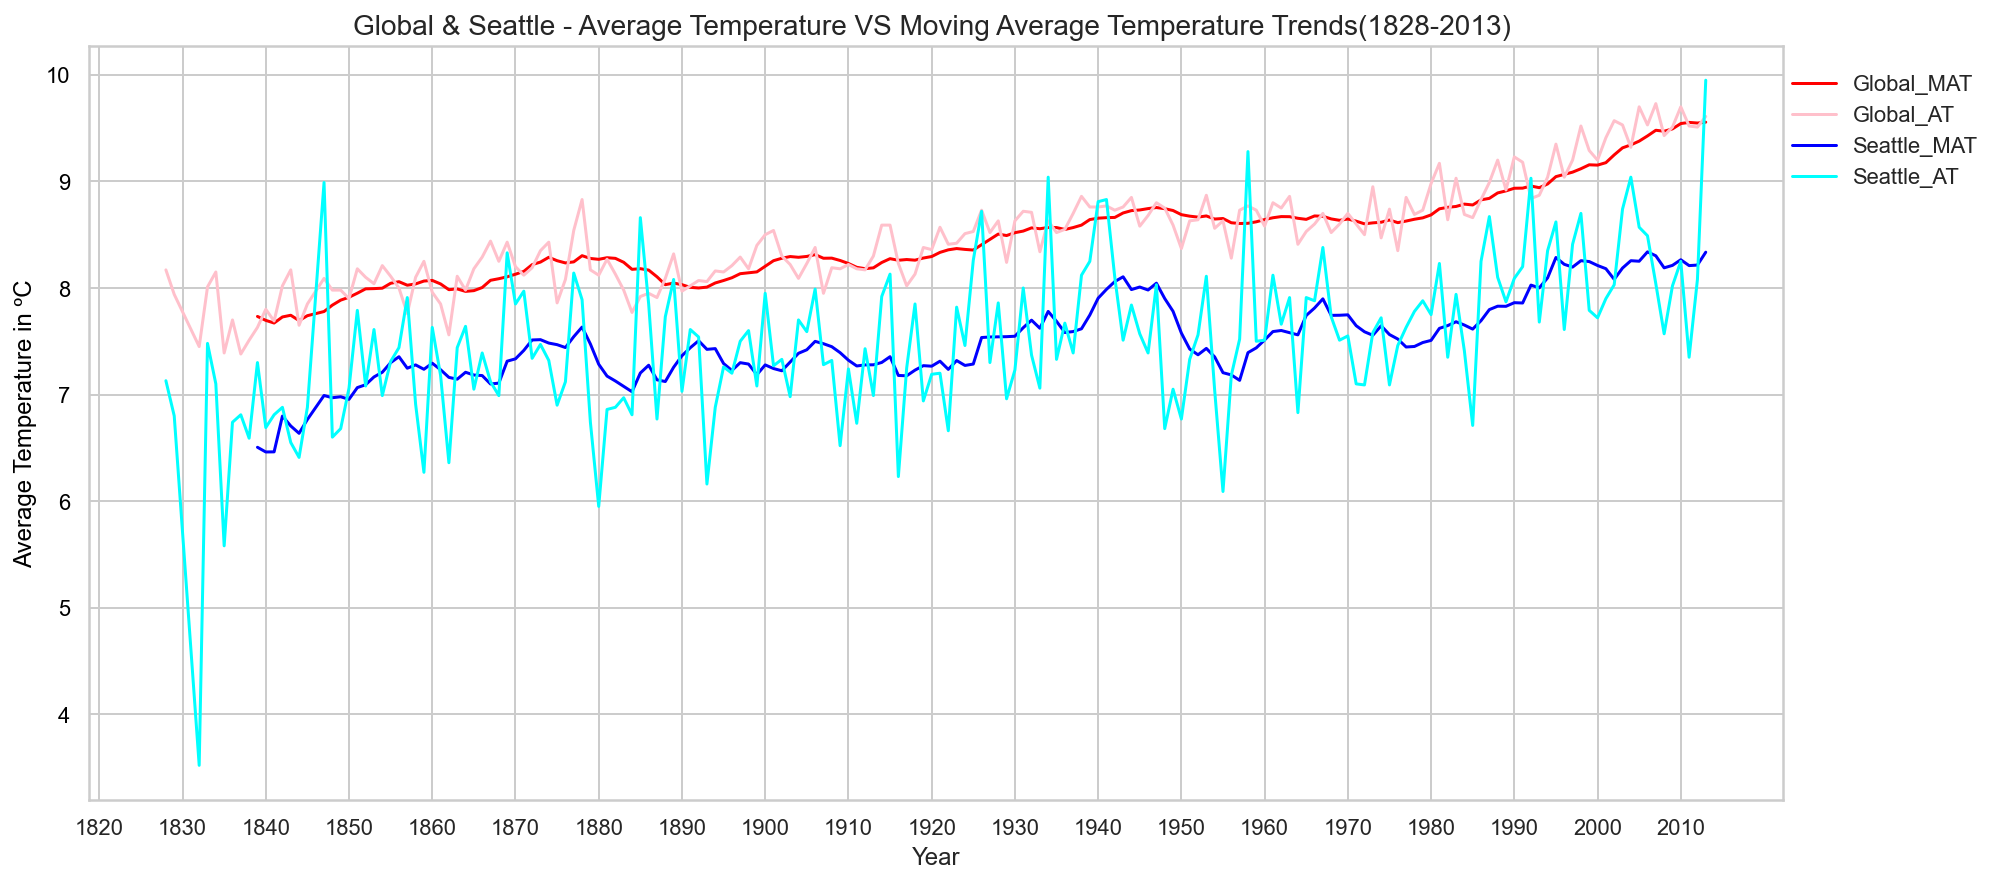

In [16]:
# Plotting line chart 
fig, ax = plt.subplots(figsize=[14,6])

# Plotting for Global Average Temperature VS Global 10-year Moving Average Temperature
ax.plot(temperature.year, temperature.global_MAT, label='Global_MAT', color='red')
ax.plot(temperature.year, temperature.global_temp, label='Global_AT', color='pink')
plt.xticks(np.arange(0, max(temperature.year)+1, 10))
ax.set_xlabel('Year', size=12)
ax.set_ylabel('Average Temperature in ºC', color='black', size=12)
ax.tick_params(axis='y', labelcolor='black')


# Plotting for Seattle Average Temperature VS Seattle 10-year Moving Average Temperature
ax.plot(temperature.year, temperature.seattle_MAT, label='Seattle_MAT', color='blue')
ax.plot(temperature.year, temperature.city_temp, label='Seattle_AT', color='cyan')
ax.tick_params(axis='y', labelcolor='black')
ax.legend(loc=[1,0.8], frameon=False)

fig.tight_layout()
ax.set_title("Global & Seattle - Average Temperature VS Moving Average Temperature Trends(1828-2013) ", size=14)
plt.show()


Insights: 
* Seattle's average temperature shows large fluctuations when compared to the Global average temperature trend,
* There are many data points that vary a lot from the average trend, this could be due to irregularities or errors in the temperature values.
* During the 19th century to mid-20th century the global moving average and Seattle city moving average follow a similar trend.
* The overall trends  remains consistent with temperatures rising every year globally and in Seattle city.

### **Correlation Coefficient Represented As A Heatmap**

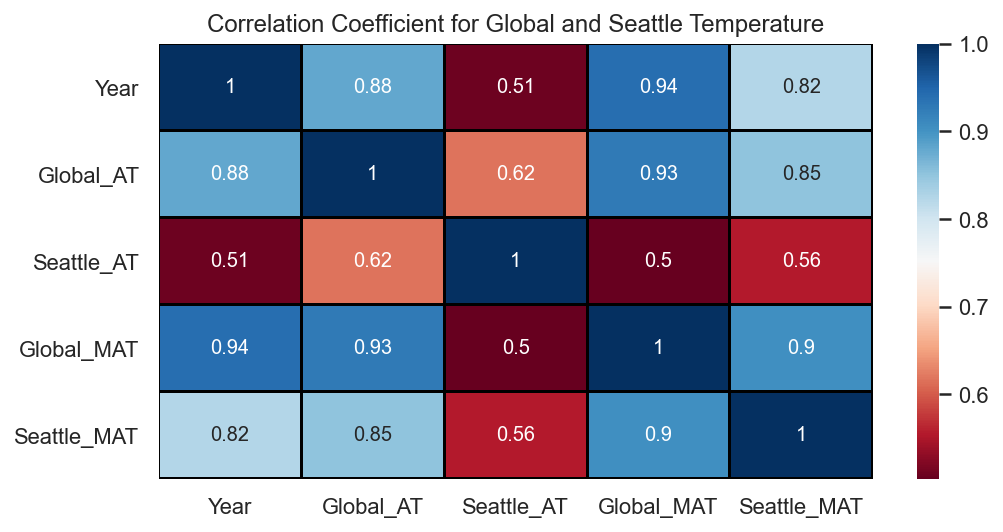

In [17]:
#Labelling the heatmap
labels=['Year','Global_AT','Seattle_AT', 'Global_MAT','Seattle_MAT']
#Plotting the heatmap
plt.figure(figsize=[8,4])
sns.heatmap(corr,annot=True,cmap="RdBu",xticklabels=labels,yticklabels=labels,linewidth=1,linecolor='black')
plt.xticks
plt.title("Correlation Coefficient for Global and Seattle Temperature", size=12)
plt.show()

**Observations** 

The correlation heatmap shows us that:
* The Global moving average temperature shows a strong positive correlation with year at 0.94, whereas Seattle has a slightly lesser relationship with year at 0.82.
* Global and Seattle Moving average temperatures have a strong positive relationship at 0.9.

## **Observations**

* The overall trend is that global as well as Seattle's average temperatures are rising, as observed from the line plots.
* Especially by the end of 20th century  & beginning of 21st century, rapid rise in average temperature is observable as the curve is getting steeper.
* Although Seattle average temperature and global average temperature fall within a very close range, Seattle is cooler by ~1°C
* Seattle's high standard deviation(SD) at 0.73 when compared to global SD at 0.49, indicates that the city's temperatures are spread out at a wider range.
* The global average temperature ranges from 7.38°C to 9.73°C , whereas Seattle average temperature lies at a much more wider range i.e. 3.52°C to 9.95°C.
* From the correlation heatmap we can say that global and Seattle moving average temperatures shows a significant dependence on each other.

## **Conclusion**

From our observations we can conclude that the world is getting warmer and the rate of warming is accelerating.Even Seattle city with it's lower average temperature shows significant warming in due course of time. Though warming has not been uniform across the planet, the upward trend in the globally averaged temperature shows that more areas are warming than cooling.

This could be due to global warming caused by carbon pollution, burning of fossil fuels etc. which has led to significant climate change.So, Earth won’t stop heating up until carbon pollution ends, all of it. We can’t reverse the warming, but we can put a stop to it.

## **References**

* [W3Schools](https://www.w3schools.com/)
* [Pandas Documentation](https://pandas.pydata.org/docs/reference/frame.html)
* [Analytics Vidhya-Handling missing values](https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/)
* [Datacamp-Data Analysis with Python Youtube](https://www.youtube.com/channel/UC79Gv3mYp6zKiSwYemEik9A)
* [Datacamp Moving Averages](https://www.datacamp.com/community/tutorials/moving-averages-in-pandas)
* [Correlation Heatmap](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)